# Data Science Challenge

## Exercise 4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
root_bookings = 'challenge/bookings.csv.bz2'
root_searches = 'challenge/searches.csv.bz2'

### Loading datasets partially:
nrows = 100,000

#### Reading Bookings extract

In [3]:
bookings_smp = pd.read_csv(root_bookings, nrows=100000, sep='^')
bookings_smp.columns

Index(['act_date           ', 'source', 'pos_ctry', 'pos_iata', 'pos_oid  ',
       'rloc          ', 'cre_date           ', 'duration', 'distance',
       'dep_port', 'dep_city', 'dep_ctry', 'arr_port', 'arr_city', 'arr_ctry',
       'lst_port', 'lst_city', 'lst_ctry', 'brd_port', 'brd_city', 'brd_ctry',
       'off_port', 'off_city', 'off_ctry', 'mkt_port', 'mkt_city', 'mkt_ctry',
       'intl', 'route          ', 'carrier', 'bkg_class', 'cab_class',
       'brd_time           ', 'off_time           ', 'pax', 'year', 'month',
       'oid      '],
      dtype='object')

In [4]:
bookings_smp = pd.read_csv(root_bookings, nrows=100000, sep='^')
bookings_smp.columns = bookings_smp.columns.str.strip()
bookings_smp.head()

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,...,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,...,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546


In [5]:
# Trimming the columns spaces
bookings_smp.columns = bookings_smp.columns.str.strip()

# Cleaning the cre_date column:
bookings_smp['cre_date'] = bookings_smp.cre_date.dropna()


bookings_smp.head()

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,...,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,...,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546


In [6]:
bookings_smp['cre_date'] = bookings_smp.cre_date.str[:10]
bookings_smp.head()

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,...,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22,1708,0,ZRH,...,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26,135270,0,SAL,...,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26,135270,0,SAL,...,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26,30885,0,AKL,...,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26,30885,0,AKL,...,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546


In [7]:
bookings_smp = bookings_smp[['cre_date', 'dep_port', 'arr_port', 'pax']]
bookings_smp.head()

,cre_date,dep_port,arr_port,pax
0,2013-02-22,ZRH,LHR,-1
1,2013-03-26,SAL,CLT,1
2,2013-03-26,SAL,CLT,1
3,2013-03-26,AKL,SVO,1
4,2013-03-26,AKL,SVO,1


In [8]:
bookings_smp = bookings_smp[bookings_smp.pax > 0]
bookings_smp_gr = bookings_smp.groupby(['cre_date', 'dep_port', 'arr_port'])['pax'].sum().sort_values(ascending=False).reset_index()
bookings_smp_gr.head()

,cre_date,dep_port,arr_port,pax
0,2013-03-18,SEA,FAY,112
1,2013-01-16,DME,CDG,110
2,2013-04-04,BKK,CAN,106
3,2013-01-22,ADL,SYD,104
4,2013-03-26,GOT,FCO,100


#### Reading Searches extract

In [9]:
searches_smp = pd.read_csv(root_searches, nrows=100000, sep='^')
searches_smp.columns = searches_smp.columns.str.strip()
searches_smp.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [10]:
searches_smp = searches_smp[['Date', 'Origin', 'Destination']]
searches_smp.head()

,Date,Origin,Destination
0,2013-01-01,TXL,AUH
1,2013-01-01,ATH,MIL
2,2013-01-01,ICT,SFO
3,2013-01-01,RNB,ARN
4,2013-01-01,OSL,MAD


In [11]:
# Cleaning Date columns
searches_smp['Date'] = searches_smp.Date.dropna()
searches_smp['Date'] = searches_smp[searches_smp.Date.str.len() == 10]

searches_smp['Date'] = pd.to_datetime(searches_smp.Date).dt.date
searches_smp.head()

,Date,Origin,Destination
0,2013-01-01,TXL,AUH
1,2013-01-01,ATH,MIL
2,2013-01-01,ICT,SFO
3,2013-01-01,RNB,ARN
4,2013-01-01,OSL,MAD


In [12]:
searches_smp.drop_duplicates(inplace=True)
searches_smp.shape

(95583, 3)

#### Last Cleaning needed before the merge

In [13]:
# Cleaning the dep_port column: strip, dropna, upper
bookings_smp_gr['dep_port'] = bookings_smp_gr.dep_port.dropna()
bookings_smp_gr['dep_port'] = bookings_smp_gr.dep_port.str.strip()
bookings_smp_gr['dep_port'] = bookings_smp_gr.dep_port.str.upper()

# Cleaning the arr_port column: strip, dropna, upper
bookings_smp_gr['arr_port'] = bookings_smp_gr.arr_port.dropna()
bookings_smp_gr['arr_port'] = bookings_smp_gr.arr_port.str.strip()
bookings_smp_gr['arr_port'] = bookings_smp_gr.arr_port.str.upper()

# Cleaning the Origin column: strip, dropna, upper
searches_smp['Origin'] = searches_smp.Origin.dropna()
searches_smp['Origin'] = searches_smp.Origin.str.strip().str.upper()

# Cleaning the Destination column: strip, dropna, upper
searches_smp['Destination'] = searches_smp.Destination.dropna()
searches_smp['Destination'] = searches_smp.Destination.str.strip().str.upper()

#### Time to merge both datasets: bookings & searches

In [14]:
print(searches_smp.head())
print(bookings_smp_gr.head())

         Date Origin Destination
0  2013-01-01    TXL         AUH
1  2013-01-01    ATH         MIL
2  2013-01-01    ICT         SFO
3  2013-01-01    RNB         ARN
4  2013-01-01    OSL         MAD
     cre_date dep_port arr_port  pax
0  2013-03-18      SEA      FAY  112
1  2013-01-16      DME      CDG  110
2  2013-04-04      BKK      CAN  106
3  2013-01-22      ADL      SYD  104
4  2013-03-26      GOT      FCO  100


In [15]:
sch_bkg_smp = searches_smp.merge(bookings_smp_gr, left_on=['Date', 'Origin', 'Destination'], right_on=['cre_date', 'dep_port', 'arr_port'], how='left')
sch_bkg_smp = sch_bkg_smp.drop(['cre_date', 'dep_port', 'arr_port'], axis=1)
sch_bkg_smp.head()

,Date,Origin,Destination,pax
0,2013-01-01,TXL,AUH,NaN
1,2013-01-01,ATH,MIL,NaN
2,2013-01-01,ICT,SFO,NaN
3,2013-01-01,RNB,ARN,NaN
4,2013-01-01,OSL,MAD,NaN


In [16]:
sch_bkg_smp['Booking'] = np.where(sch_bkg_smp.pax.isna(), 0, 1)
sch_bkg_smp.head()

,Date,Origin,Destination,pax,Booking
0,2013-01-01,TXL,AUH,NaN,0
1,2013-01-01,ATH,MIL,NaN,0
2,2013-01-01,ICT,SFO,NaN,0
3,2013-01-01,RNB,ARN,NaN,0
4,2013-01-01,OSL,MAD,NaN,0


In [17]:
sch_bkg_smp['Booking'] = np.where(
                            sch_bkg_smp.pax.isna(),
                            0,
                            1)
sch_bkg_smp = sch_bkg_smp.sort_values(by='pax', ascending=False)
sch_bkg_smp.head()

,Date,Origin,Destination,pax,Booking
0,2013-01-01,TXL,AUH,NaN,0
1,2013-01-01,ATH,MIL,NaN,0
2,2013-01-01,ICT,SFO,NaN,0
3,2013-01-01,RNB,ARN,NaN,0
4,2013-01-01,OSL,MAD,NaN,0


In [18]:
sch_bkg_smp.Booking.value_counts()

0    95583
Name: Booking, dtype: int64

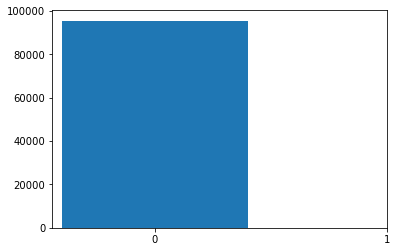

In [19]:
plt.bar(sch_bkg_smp.Booking.value_counts().index, sch_bkg_smp.Booking.value_counts().values)

plt.xticks([0, 1])

plt.show()

### Loading the entire datasets

Define the functions to clean the datasets when reading them

In [3]:
def clean_bookings(data):
    "Returns DataFrame filtering and cleaning the initial dataset"
    import warnings
    
    warnings.filterwarnings('ignore')
    
    # Trimming the columns spaces
    data.columns = data.columns.str.strip()
    
    # Cleaning the cre_date column:
    data['cre_date'] = data.cre_date.dropna()
    data['cre_date'] = data.cre_date.str[:10]
    data['cre_date'] = pd.to_datetime(data.cre_date, errors='coerce').dt.date
    
    # Cleaning the dep_port column: strip, dropna, upper
    data['dep_port'] = data.dep_port.dropna()
    data['dep_port'] = data.dep_port.str.strip()
    data['dep_port'] = data.dep_port.str.upper()
    
    # Cleaning the arr_port column: strip, dropna, upper
    data['arr_port'] = data.arr_port.dropna()
    data['arr_port'] = data.arr_port.str.strip()
    data['arr_port'] = data.arr_port.str.upper()
    
    # Delete the return bookings: pax < 0 (negative)
    data = data[data.pax > 0]
    data = data.groupby(['cre_date', 'dep_port', 'arr_port'])['pax'].sum().sort_values(ascending=False).reset_index().drop_duplicates()
    
    return data

In [15]:
def clean_searches(data):
    "Cleaner dedicated to shrink the data imported and treated by pd.read_csv"
    import warnings
    
    warnings.filterwarnings('ignore')
    
    # Trimming the columns spaces
    data.columns = data.columns.str.strip()
    
    # Cleaning Date columns
    data['Date'] = data.Date.dropna()
    data['Date'] = data[data.Date.str.len() == 10]   # A Date should have no more than 10 characters
    data['Date'] = pd.to_datetime(data.Date, errors='coerce').dt.date
    
    # Cleaning the Origin column: strip, dropna, upper
    data['Origin'] = data.Origin.dropna()
    data['Origin'] = data.Origin.str.strip().str.upper()
    
    # Cleaning the Destination column: strip, dropna, upper
    data['Destination'] = data.Destination.dropna()
    data['Destination'] = data.Destination.str.strip().str.upper()
    
    data = data.drop_duplicates()
    
    return data

Creating empty csv to dump the data for each append and store the data in the ROM instead of in the RAM

Loading the full datasets: bookings & searches

In [5]:
BookingsFile = pd.read_csv(root_bookings, usecols=['cre_date           ', 'dep_port', 'arr_port', 'pax'], sep='^', chunksize=10**6)
b_chunks = []
loaded_rows = 0
for chunk in BookingsFile:
    loaded_rows += chunk.shape[0]
    cleaned_chunk = clean_bookings(chunk)
    
    b_chunks.append(cleaned_chunk)
    
    print(cleaned_chunk)
    print("Rows loaded:", loaded_rows)

          cre_date dep_port arr_port  pax
0       2013-10-11      SVO      VCE  320
1       2013-02-13      LED      KGD  268
2       2013-05-20      JFK      ATH  264
3       2012-07-16      TLV      PEK  242
4       2013-01-10      ARN      KRN  238
...            ...      ...      ...  ...
315568  2013-04-24      LGA      RSW    1
315569  2013-01-18      PAZ      MEX    1
315570  2013-01-18      PBO      PER    1
315571  2013-03-04      NAT      SDU    1
315572  2013-04-01      NCL      DXB    1

[315573 rows x 4 columns]
Rows loaded: 1000000
          cre_date dep_port arr_port  pax
0       2013-10-11      SVO      VCE  320
1       2013-02-13      LED      KGD  268
2       2013-05-20      JFK      ATH  264
3       2012-07-16      TLV      PEK  242
4       2013-01-10      ARN      KRN  238
...            ...      ...      ...  ...
315568  2013-04-24      LGA      RSW    1
315569  2013-01-18      PAZ      MEX    1
315570  2013-01-18      PBO      PER    1
315571  2013-03-04      NAT 

In [6]:
bookings = pd.concat(b_chunks).drop_duplicates()
print(bookings.head())
print("Number of rows in bookings:", bookings.shape[0])

     cre_date dep_port arr_port    pax
0  2013-10-11      SVO      VCE  320.0
1  2013-02-13      LED      KGD  268.0
2  2013-05-20      JFK      ATH  264.0
3  2012-07-16      TLV      PEK  242.0
4  2013-01-10      ARN      KRN  238.0
315585


In [16]:
SearchesFile = pd.read_csv(root_searches, usecols=['Date', 'Origin', 'Destination'], sep='^', chunksize=10**6)
s_chunks = []
loaded_rows = 0
for chunk in SearchesFile:
    loaded_rows += chunk.shape[0]
    cleaned_chunk = clean_searches(chunk)
    
    s_chunks.append(cleaned_chunk)
    
    print(cleaned_chunk)
    print("Rows loaded:", loaded_rows)

              Date Origin Destination
0       2013-01-01    TXL         AUH
1       2013-01-01    ATH         MIL
2       2013-01-01    ICT         SFO
3       2013-01-01    RNB         ARN
4       2013-01-01    OSL         MAD
...            ...    ...         ...
358994  2013-12-25    MRV         LED
358995  2013-12-25    AMD         DEL
358996  2013-12-25    DUS         VIE
358997  2013-12-25    YVR         YYZ
358998  2013-12-25    DME         BKK

[344176 rows x 3 columns]
Rows loaded: 1000000
               Date Origin Destination
1000000  2013-10-10    YVR         YXE
1000001  2013-10-10    MOW         FLR
1000002  2013-10-10    PER         DPS
1000003  2013-10-10    JFK         KIN
1000004  2013-10-10    PER         KTA
...             ...    ...         ...
1358996  2013-10-09    IST         LAS
1358997  2013-10-09    CPH         AGP
1358998  2013-10-09    LON         BJS
1358999  2013-10-09    STO         PAR
1436001         NaT    NaN         NaN

[344177 rows x 3 columns]
R

In [17]:
searches = pd.concat(s_chunks).drop_duplicates()
print(searches.head())
print("Number of rows in searches:", searches.shape[0])

         Date Origin Destination
0  2013-01-01    TXL         AUH
1  2013-01-01    ATH         MIL
2  2013-01-01    ICT         SFO
3  2013-01-01    RNB         ARN
4  2013-01-01    OSL         MAD
Number of rows in searches: 344178


In [18]:
sch_bkg = searches.merge(bookings, left_on=['Date', 'Origin', 'Destination'], right_on=['cre_date', 'dep_port', 'arr_port'], how='left')
sch_bkg = sch_bkg.drop(['cre_date', 'dep_port', 'arr_port'], axis=1)
print(sch_bkg.head())
print("Number of rows in merged file", sch_bkg.shape[0])

         Date Origin Destination  pax
0  2013-01-01    TXL         AUH  NaN
1  2013-01-01    ATH         MIL  NaN
2  2013-01-01    ICT         SFO  NaN
3  2013-01-01    RNB         ARN  NaN
4  2013-01-01    OSL         MAD  NaN
Number of rows in merged file 344178


In [19]:
sch_bkg['Booking'] = np.where(
                            sch_bkg.pax.isna(),
                            0,
                            1)
sch_bkg = sch_bkg.sort_values(by='pax', ascending=False)
sch_bkg.head()

,Date,Origin,Destination,pax,Booking
89085,2013-04-04,BKK,CAN,138.0,1
8476,2013-01-09,LHR,JFK,132.0,1
175560,2013-07-03,MUC,BCN,126.0,1
176835,2013-07-04,BKK,NRT,123.0,1
14427,2013-01-16,FRA,JFK,120.0,1


In [20]:
sch_bkg.Booking.value_counts()

0    333258
1     10920
Name: Booking, dtype: int64

The ratio of bookings done based on searches is: 3.28%


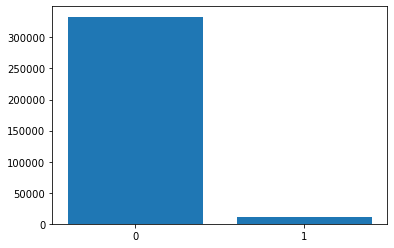

In [26]:
print("The ratio of bookings done based on searches is: {:.2%}".format(sch_bkg.Booking.value_counts().values[1] / sch_bkg.Booking.value_counts().values[0]))

plt.bar(sch_bkg.Booking.value_counts().index, sch_bkg.Booking.value_counts().values)

plt.xticks([0, 1])

plt.show()

After analysing the whole dataset, we can conclude that the 3.28% of the searches end up in a valuable booking.